In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [4]:
data=pd.read_csv('data.csv')

In [6]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [7]:
data.shape

(1000, 11)

In [8]:
data['parent_was_in_college'].unique()

array([False,  True])

In [9]:
data.describe

<bound method NDFrame.describe of     type_school school_accreditation  gender          interest residence  \
0      Academic                    A    Male   Less Interested     Urban   
1      Academic                    A    Male   Less Interested     Urban   
2      Academic                    B  Female   Very Interested     Urban   
3    Vocational                    B    Male   Very Interested     Rural   
4      Academic                    A  Female   Very Interested     Urban   
..          ...                  ...     ...               ...       ...   
995  Vocational                    A  Female   Very Interested     Rural   
996    Academic                    B  Female   Less Interested     Rural   
997  Vocational                    A    Male   Less Interested     Urban   
998    Academic                    B    Male         Uncertain     Rural   
999    Academic                    B    Male  Quiet Interested     Urban   

     parent_age  parent_salary  house_area  average_g

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [11]:
pd.crosstab(index=data['type_school'],columns=data['gender'],)

gender,Female,Male
type_school,,
Academic,302,307
Vocational,183,208


In [31]:
pd.crosstab(index=data['type_school'],columns=data['interest'],)

interest,Less Interested,Not Interested,Quiet Interested,Uncertain,Very Interested
type_school,,,,,
Academic,182,30,59,126,212
Vocational,47,56,41,135,112


In [12]:
pd.crosstab(index=data['type_school'],columns=data['parent_was_in_college'],)

parent_was_in_college,False,True
type_school,,
Academic,328,281
Vocational,152,239


In [35]:
pd.crosstab(index=data['school_accreditation'],columns=data['interest'],margins=True)

interest,Less Interested,Not Interested,Quiet Interested,Uncertain,Very Interested,All
school_accreditation,,,,,,
A,132,24,46,106,173,481
B,97,62,54,155,151,519
All,229,86,100,261,324,1000


In [34]:
pd.crosstab(index=data['school_accreditation'],columns=data['in_college'],margins=True)

in_college,False,True,All
school_accreditation,,,
A,233,248,481
B,267,252,519
All,500,500,1000


In [13]:
pd.crosstab(index=data['gender'],columns=data['parent_was_in_college'], margins= True)

parent_was_in_college,False,True,All
gender,,,
Female,218,267,485
Male,262,253,515
All,480,520,1000


In [14]:
data.corr()

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
parent_age,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873
parent_salary,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693
house_area,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267
average_grades,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133
parent_was_in_college,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038
in_college,0.042873,0.475693,0.467267,0.505133,0.048038,1.000000


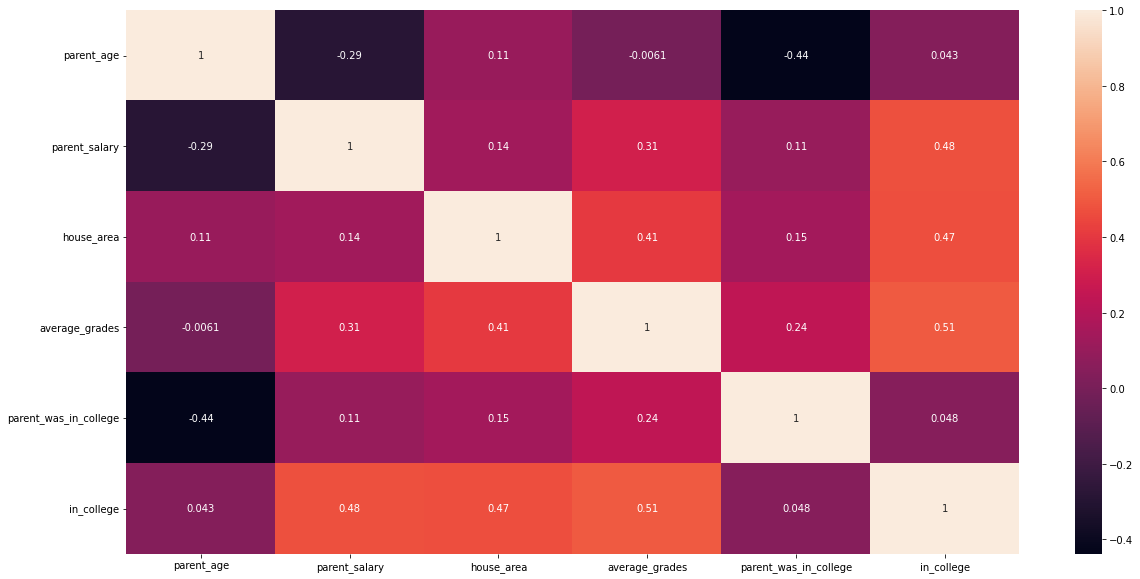

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15bfd37850>,
      dtype=object)

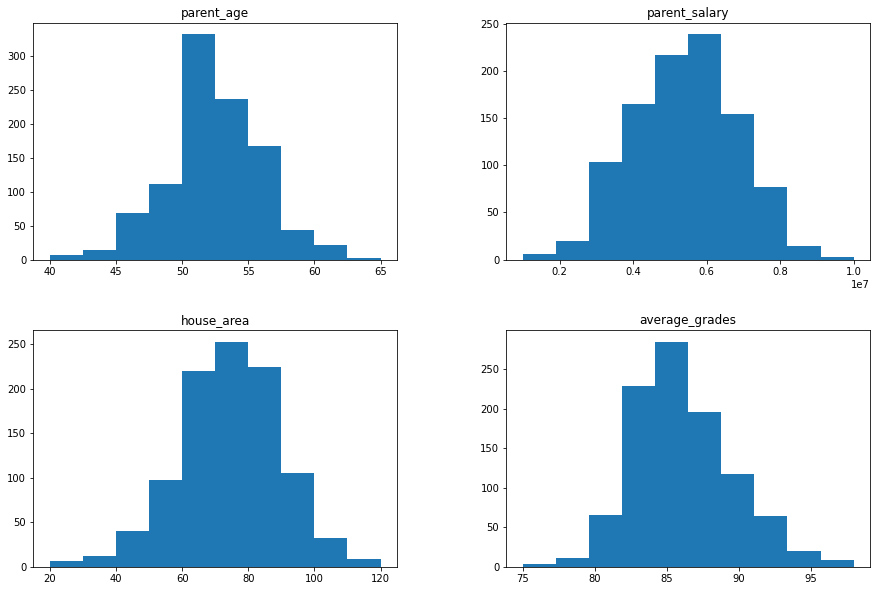

In [16]:
data.hist(bins=10, figsize=(15, 10),grid=False,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


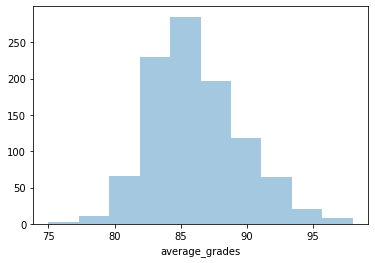

In [17]:
sns.distplot(data['average_grades'],bins=10,kde=False,)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


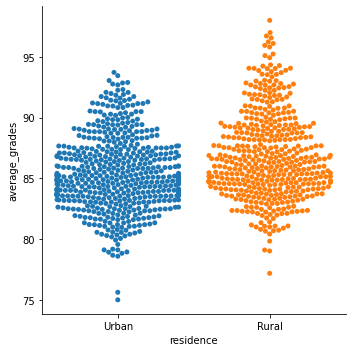

In [18]:
sns.catplot(x='residence',y="average_grades",kind='swarm', data=data)

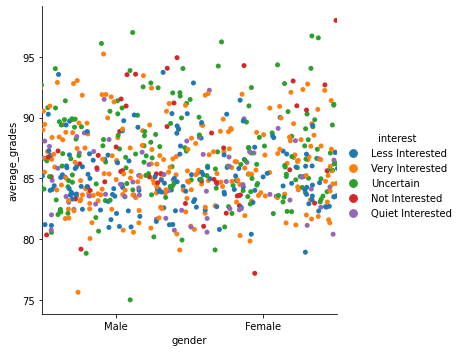

In [28]:
sns.catplot(x='gender',y="average_grades",kind='strip',hue='interest',jitter=1.5,data=data)

<AxesSubplot:xlabel='in_college', ylabel='average_grades'>

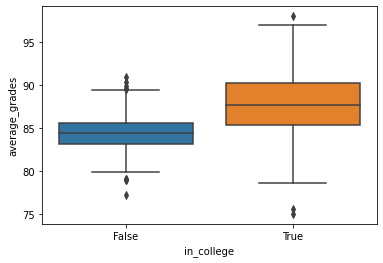

In [ ]:
sns.boxplot(x='in_college',y='average_grades',data=data)

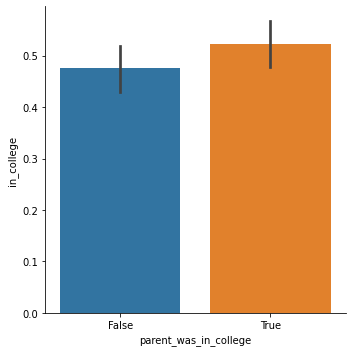

In [21]:
sns.catplot(x='parent_was_in_college',y='in_college',kind='bar',data=data)

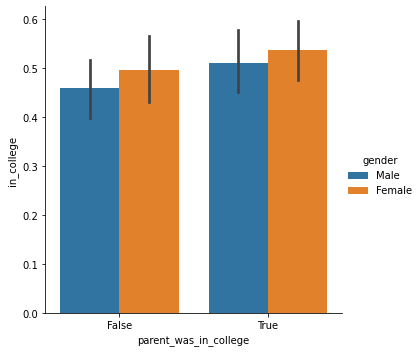

In [23]:
sns.catplot(x='parent_was_in_college',y='in_college',hue='gender',kind='bar',data=data)

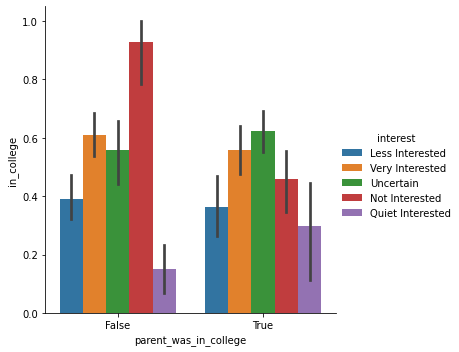

In [24]:
sns.catplot(x='parent_was_in_college',y='in_college',hue='interest',kind='bar',data=data)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
lb= LabelEncoder()

In [39]:
data['type_school']=lb.fit_transform(data['type_school'])
data['school_accreditation']=lb.fit_transform(data['school_accreditation'])
data['gender']=lb.fit_transform(data['gender'])
data['interest']=lb.fit_transform(data['interest'])
data['residence']=lb.fit_transform(data['residence'])
data['parent_was_in_college']=lb.fit_transform(data['parent_was_in_college'])
data['in_college']=lb.fit_transform(data['in_college'])

In [40]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,0,1
1,0,0,1,0,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


In [41]:
x=data.drop('in_college', axis =1)

In [42]:
scaler =StandardScaler()
x = scaler.fit_transform(x)

In [43]:
y=data['in_college']

In [44]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
lg=LogisticRegression()

In [46]:
 lgr=lg.fit(train_x,train_y)
prediction=lg.predict(test_x)

In [ ]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], d

In [49]:
score =accuracy_score(prediction,test_y)
matrix=confusion_matrix(prediction,test_y)
report =classification_report(prediction,test_y)

In [50]:
score,matrix,

(0.85, array([[123,  24],
        [ 21, 132]]))

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.85       147\n           1       0.85      0.86      0.85       153\n\n    accuracy                           0.85       300\n   macro avg       0.85      0.85      0.85       300\nweighted avg       0.85      0.85      0.85       300\n'